# Ecuaciones diferenciales estocásticas


# Diferenciales

- Diferencial de potencia de $W_t$: Validación numérica de fórmul $d(W_t^p)=p(W_t^{p-2})(W_t dW_t+\frac{p-1}{2}dt)$
(Nota: $(W_t)(dW_t)$ se aproxima por $(W_{t_{i}})(W_{t_{i+1}}-W_{t_i})$), por lo que al multiplicar elemento a elmento el vector $W_t*dW_t$ se elimina la última entrada de $W_t$

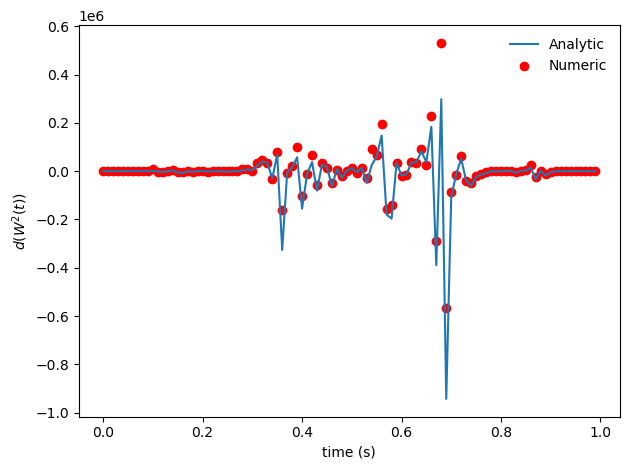

In [2]:
#Diferenciales
import numpy as np
import matplotlib.pyplot as plt 
import brownian_motion as bm

T=1
n=101
p=6
t=np.linspace(0,T,n)
dt=T/(n-1)

dW=bm.get_dB(n-1,dt=1)
W=np.insert(np.cumsum(dW),0,0)
F_t=W**p #Elemento a elemento. Vector del proceso
W=W[:-1]
dF=p*(W**(p-2))*(W*dW+((n-1)/2)*dt)#Teórico

delta_F=np.diff(F_t)

# Plots
plt.figure(1)
plt.plot(t[:-1],np.transpose(dF),label="Analytic")
plt.scatter(t[:-1],np.transpose(delta_F),label="Numeric",color='red')
plt.xlabel('time (s)')
plt.ylabel(r'$d(W^2(t))$')
plt.legend(frameon=False)
plt.tight_layout()


Caso $tW_t=$

array([[1],
       [2],
       [3]])

# Browniano geométrico

- Aproximación numérica de ejemplo base sin drift.

## Aproximación numérica vs solución intuida

$S_{t_{i+1}}=S_{t_i}+\sigma S_{t_i}\Delta W_{t_{i+1}}$

Comparada con solución intuida de EDO $S_t=e^{\sigma W_t}$

Por Ito conozco la solución correcta: $S_t=S_0e^{\frac{-\sigma^2t}{2}+\sigma W_t}$

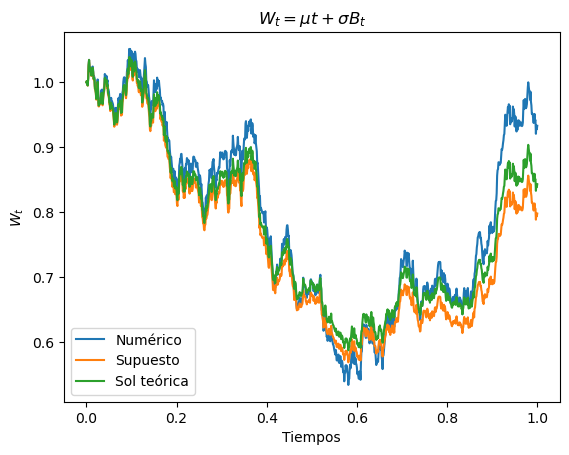

In [61]:
T=1
n=1001
time=np.linspace(0,T,n)
dt=T/(n-1)
sigma=0.3
mu=0.2
S_num=np.zeros(n)
S_num[0]=1

dW=bm.get_dB(n-1,dt)

#Aprox numérica
W=np.cumsum(np.insert(dW,0,0)) #Igual longitud que vector de tiempos
#O usar get_B y luego dW=bm.dif_B(W) que hace el prepend 

for i in range(1,n):
    S_num[i]=(1+mu*dt)*S_num[i-1]+sigma*dW[i-1] 
#Solución intuida de EDO
S_supuesto=np.exp(sigma*W)
#Solución real
S_teor=S_num[0]*np.exp((mu-sigma**2)*time/2+sigma*W)

fig, ax = plt.subplots()
ax.plot(time,np.array([S_num,S_supuesto,S_teor]).T)
ax.legend(["Numérico","Supuesto","Sol teórica"])
ax.set_title("$W_t = \mu t +\sigma B_t$")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 


In [8]:
X_t=np.linspace(0,5,6)
#F_t=X_t**2
dX=np.diff(X_t,prepend=0)
X_t[:-1]
dX


array([0., 1., 1., 1., 1., 1.])

In [2]:
import numpy as np 

bm.get_B_matrix(10,2)


array([[ 0.        , -0.42808994, -0.74627536,  0.16970732, -1.67617983,
        -2.78125288, -1.97426329, -0.94329223, -0.75795856, -0.22062212],
       [ 0.        , -0.2533321 ,  0.26897806,  0.90202702, -0.14125788,
        -2.15310364, -2.98719397, -2.47320658, -3.31617467, -4.74929123]])